In [6]:
import pandas as pd
import matplotlib.pyplot as plt
#!pip install squarify
import squarify
import numpy as np
import matplotlib

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

surv = pd.read_csv("survey_ita.tsv",sep="\t").iloc[:,3:]

surv.head(3)

,Età,Genere,Regione di appartenenza della struttura sanitaria in cui opera,Tipologia della struttura sanitaria,Ruolo professionale (è possibile indicare più di 1 risposta),Le sue prestazioni sanitarie hanno subito un calo durante l'emergenza?,"Se ha risposto sì, qual è stata la motivazione principale del calo?","Se ha risposto sì, quantifichi l'impatto dell'emergenza sulla sua attività lavorativa:",Con quali modalità ha erogato le sue prestazioni DURANTE l'emergenza?,La Regione di appartenenza della struttura in cui opera dispone del registro clinico elettronico?,...,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Valutazione/Monitoraggio di pazienti di nuovo esordio].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Gestione dell'emergenza].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Monitoraggio della terapia farmacologica].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Prescrizione di farmaci].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Psicoterapia live].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Psicoterapia tramite trasferimento di materiale audio-visivo].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Riabilitazione psichiatrica].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Consulenza giuridica in ambito civile].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Consulenza giuridica in ambito penale].1,L'impiego di strumenti telematici per la salute mentale permette di abbattere la barriera dello stigma
0,32,Femminile,Toscana,Azienda Ospedaliera,Psichiatra,Sì,lockdown,31-50%,"Mista, prevalentemente tramite strumenti telem...",No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36,Femminile,Puglia,Azienda Ospedaliera,Infermiere specializzato,Sì,Lockdown,91-100%,"In remoto, tramite strumenti telematici",No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41 - 50,Maschile,Lazio,Ospedale Privato/Casa di Cura convenzionato co...,Psicoterapeuta,Sì,Ho contratto l'infezione,10,Esclusivamente in presenza,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ages[ages>1]

20 - 30    13.414634
31 - 40    42.073171
41 - 50    17.682927
51 - 60    18.902439
> 60        6.707317
Name: Età, dtype: float64

Text(0.5, 1.0, 'AGE')

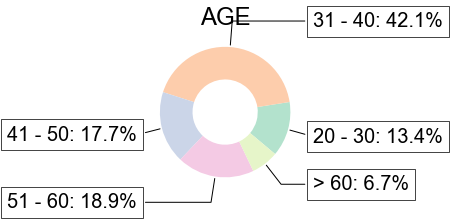

In [11]:
ages = surv["Età"].value_counts().sort_index()
ages = 100*(ages/ages.sum())
ages = ages[ages>1]

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

annot = [n+": "+str(np.round(v,1))+"%" for n,v in ages.items()]

data = ages.values

colors =['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9']
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(annot[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("AGE")


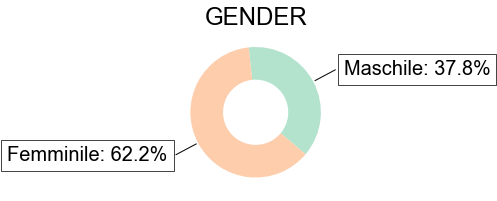

In [12]:
gender = surv["Genere"].value_counts().sort_index(ascending=False)
gender = 100*(gender/gender.sum())

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

annot = [n+": "+str(np.round(v,1))+"%" for n,v in gender.items()]

data = gender.values

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(annot[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("GENDER")

plt.show()
